In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. 将词进行独热编码（One-hot Encoding）表示
    king_onehot = np.array([1, 0, 0, 0])
    queen_onehot = np.array([0, 1, 0, 0])
    man_onehot = np.array([0, 0, 1, 0])
    woman_onehot = np.array([0, 0, 0, 1])

In [ ]:
# 2. 初始化参数矩阵
np.random.seed(42)  # 固定随机种子
E = np.random.randn(4, 3) * 0.1  # 随机初始化，4个词×3维
print("初始嵌入矩阵：")
print(E)

初始嵌入矩阵：
[[ 0.04967142 -0.01382643  0.06476885]
 [ 0.15230299 -0.02341534 -0.0234137 ]
 [ 0.15792128  0.07674347 -0.04694744]
 [ 0.054256   -0.04634177 -0.04657298]]


In [40]:
# 3. 计算词的嵌入。根据上面的独热编码和嵌入矩阵，通过矩阵乘法得到词的嵌入。
king_emb = king_onehot.dot(E)
queen_emb = queen_onehot.dot(E)
man_emb = man_onehot.dot(E)
woman_emb = woman_onehot.dot(E)
print(king_emb)
print(queen_emb)
print(man_emb)
print(woman_emb)

[ 0.04967142 -0.01382643  0.06476885]
[ 0.15230299 -0.02341534 -0.0234137 ]
[ 0.15792128  0.07674347 -0.04694744]
[ 0.054256   -0.04634177 -0.04657298]


In [41]:
# 梯度下降优化参数设置
learning_rate = 0.01  # 学习率
iterations = 1000     # 迭代次数
loss_history = []     # 记录损失变化

# 计算预测向量和损失
predicted_vec = king_emb - man_emb + woman_emb
diff = predicted_vec - queen_emb
initial_loss = np.sum(diff **2)
loss_history.append(initial_loss)


In [42]:
# 迭代优化
for i in range(iterations):
    # 计算当前词嵌入向量
    king_emb = king_onehot.dot(E)
    queen_emb = queen_onehot.dot(E)
    man_emb = man_onehot.dot(E)
    woman_emb = woman_onehot.dot(E)
    
    # 计算预测向量和损失值
    predicted_vec = king_emb - man_emb + woman_emb
    diff = predicted_vec - queen_emb
    loss = np.sum(diff** 2)
    
    # 计算梯度（对每个词嵌入的偏导数）
    grad_king = 2 * diff
    grad_queen = -2 * diff
    grad_man = -2 * diff
    grad_woman = 2 * diff
    
    # 构建完整梯度矩阵
    grad_E = np.zeros_like(E)
    grad_E[0] = grad_king  # king对应第0行
    grad_E[1] = grad_queen  # queen对应第1行
    grad_E[2] = grad_man    # man对应第2行
    grad_E[3] = grad_woman  # woman对应第3行
    
    # 更新嵌入矩阵（梯度下降）
    E -= learning_rate * grad_E
    
    # 记录损失
    loss_history.append(loss)
    
    # 每100次迭代打印一次信息
    if i % 100 == 0:
        print(f"迭代 {i}/{iterations}, 损失: {loss:.6f}")

迭代 0/1000, 损失: 0.063282
迭代 100/1000, 损失: 0.000000
迭代 200/1000, 损失: 0.000000
迭代 300/1000, 损失: 0.000000
迭代 400/1000, 损失: 0.000000
迭代 500/1000, 损失: 0.000000
迭代 600/1000, 损失: 0.000000
迭代 700/1000, 损失: 0.000000
迭代 800/1000, 损失: 0.000000
迭代 900/1000, 损失: 0.000000


In [43]:
# 重新计算最终的词嵌入
king_emb = king_onehot.dot(E)
queen_emb = queen_onehot.dot(E)
man_emb = man_onehot.dot(E)
woman_emb = woman_onehot.dot(E)

In [44]:
# 4. 写出损失函数的计算公式
predicted_queen = king_emb - man_emb + woman_emb

In [45]:
# 结果验证
print("\n优化后结果：")
print(f"king嵌入: {king_emb}")
print(f"man嵌入: {man_emb}")
print(f"woman嵌入: {woman_emb}")
print(f"king - man + woman = {predicted_queen}")
print(f"queen嵌入: {queen_emb}")
print(f"最终损失: {loss:.6f}")
print(f"预测与真实queen的差异: {np.sum((predicted_queen - queen_emb) **2):.6f}")


优化后结果：
king嵌入: [0.10124563 0.01454765 0.0426296 ]
man嵌入: [ 0.10634707  0.04836939 -0.02480819]
woman嵌入: [ 0.10583022 -0.01796769 -0.06871223]
king - man + woman = [ 0.10072877 -0.05178942 -0.00127444]
queen嵌入: [ 0.10072877 -0.05178942 -0.00127444]
最终损失: 0.000000
预测与真实queen的差异: 0.000000


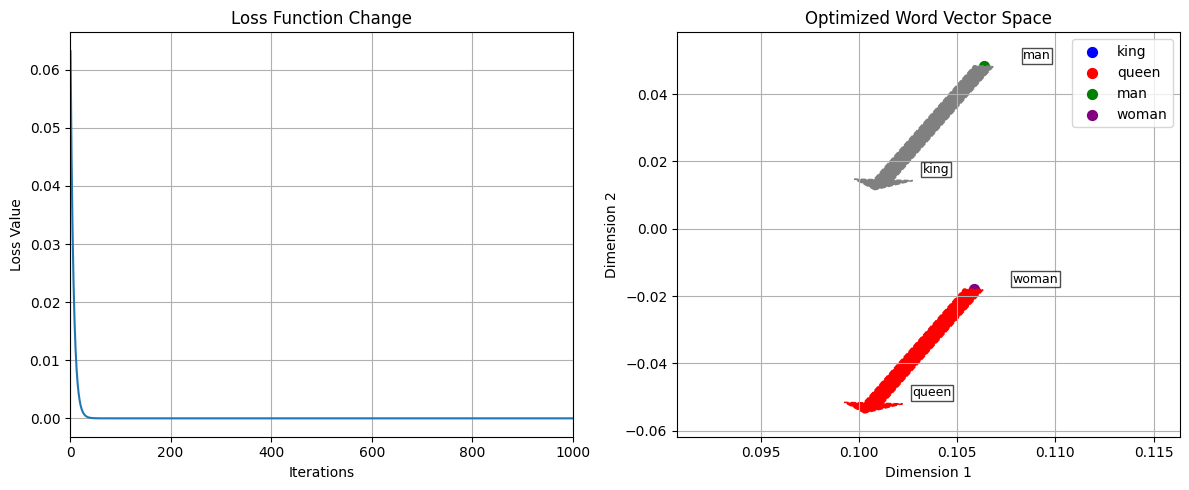

In [46]:
# 可视化
plt.figure(figsize=(12, 5))

# 损失曲线
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Loss Function Change")
plt.xlabel("Iterations")
plt.ylabel("Loss Value")
plt.grid(True)
plt.xlim(0, 1000)

# 词向量空间分布
plt.subplot(1, 2, 2)
vectors = [king_emb, queen_emb, man_emb, woman_emb]
labels = ["king", "queen", "man", "woman"]
colors = ["blue", "red", "green", "purple"]

x_coords = [vec[0] for vec in vectors]
y_coords = [vec[1] for vec in vectors]
margin = 0.01  # Margin around vectors
x_min, x_max = min(x_coords) - margin, max(x_coords) + margin
y_min, y_max = min(y_coords) - margin, max(y_coords) + margin

for vec, label, color in zip(vectors, labels, colors):
    plt.scatter(vec[0], vec[1], c=color, label=label, s=50)
    plt.text(
        vec[0] + 0.002, vec[1] + 0.002, 
        label, 
        fontsize=9, 
        bbox=dict(facecolor='white', alpha=0.7, pad=1)
    )

# 绘制向量关系：king - man ≈ queen - woman
arrow_kwargs = dict(head_width=0.003, head_length=0.003, linestyle='--')
plt.arrow(
    man_emb[0], man_emb[1], 
    king_emb[0]-man_emb[0], king_emb[1]-man_emb[1], 
    fc='gray', ec='gray', **arrow_kwargs
)
plt.arrow(
    woman_emb[0], woman_emb[1], 
    queen_emb[0]-woman_emb[0], queen_emb[1]-woman_emb[1], 
    fc='red', ec='red', **arrow_kwargs
)

plt.title("Optimized Word Vector Space")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.legend(loc='upper right')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)


plt.tight_layout()
plt.show()
